# Exploratory analysis

Before trying to understand which variables in the dataset could have a significant statistic association with the abortion ratio in Europe, we can visualize the magnitude of each predictor and make some considerations.

The analysis does not consider all the elements in the dataset, but just the ones that allow a quick overview of the abortion situation across the continent. The dataset used is "final_df_procapite.csv", in which the live births have been divided by the population of each country, in order to allow a better comparison between the states.

## Live births 18y VS 30y

We start from the observation of the live births procapite of the mothers aged 18 years old and 30 years old in every European country. We expect to see in the majority of cases a greater number of live births at 30 years old, because it is more probable that a woman has already obtained her own financial stability. 

In [ ]:
# Bokeh palette reference: https://docs.bokeh.org/en/latest/docs/reference/palettes.html

In [1]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [2]:
import numpy as np
import pandas as pd
from bokeh.core.properties import value
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge

In [3]:
#Import the dataset
df = pd.read_csv('final_df_procapite.csv')
df

,geo,country,population,age_1_child,employed_women_2018,abortion_ratio,social_benefit,mean_income,fertility_rate,lb_18y_procapite,lb_30y_procapite,lb_inmar_procapite,lb_outmar_procapite,lb_foreign_procapite
0,AT,Austria,8822267,29.5,0.686,20.9,993.78,27804.0,1.47,0.000034,0.000703,0.005695,0.004001,0.002901
1,BE,Belgium,11398589,29.0,0.607,154.4,717.46,25196.0,1.62,0.000039,0.000895,0.004946,0.005434,0.002561
2,BG,Bulgaria,7050034,26.2,0.630,376.8,113.35,4644.0,1.56,0.000222,0.000567,0.003664,0.005158,0.000056
3,CH,Switzerland,8484130,30.9,0.757,116.8,901.61,49607.0,1.52,0.000014,0.000784,0.007694,0.002661,0.004128
4,CY,Cyprus,864236,29.8,0.642,0.4,288.41,17582.0,1.32,0.000051,0.000860,0.008767,0.002027,0.003356
5,CZ,Czech Republic,10610055,28.4,0.676,160.5,295.16,10098.0,1.71,0.000066,0.000837,0.005532,0.005216,0.000685
6,DE,Germany,82792351,29.7,0.711,128.2,1199.25,25882.0,1.57,0.000048,0.000728,0.006288,0.003224,0.002237
7,DK,Denmark,5781190,29.5,0.713,231.0,1647.17,33759.0,1.73,0.000021,0.000858,0.004868,0.005766,0.001705
8,EE,Estonia,1319133,27.7,0.725,264.5,357.58,11746.0,1.67,0.000057,0.000857,0.004974,0.005891,0.001023
9,EL,Greece,10741165,30.4,0.446,234.7,287.17,9034.0,1.35,0.000053,0.000511,0.007152,0.000896,0.001146


In [4]:
#Every value of the columns related to the live births of 18 and 30 years-old-mothers has been multiplied for 100000 
#in order to obtain a better representation in the graph below

states = df['country'].tolist()
values = ['18y', '30y']

bar = list(np.around(np.array(df['lb_18y_procapite'].tolist()),7))
bar1 = [x*100000 for x in bar]
bar1 = np.around(bar1,3)

bar = list(np.around(np.array(df['lb_30y_procapite'].tolist()),7))
bar2 = [x*100000 for x in bar]
bar2 = np.around(bar2,3)

data = {'states' : states,
        '18y' : bar1,
        '30y' : bar2}

source = ColumnDataSource(data=data)

sorted_bars = sorted(states, key=lambda x: bar2[states.index(x)])

p = figure(x_range=sorted_bars, y_range=(0, 100), plot_height=500, plot_width=1000,
           title="Live births procapite by mother's age",
           toolbar_location=None, tools="")

p.vbar(x=dodge('states', -0.25, range=p.x_range), 
       top='18y', width=0.5, source=source,
       color="#225ea8", legend_label="18y") #18y bars 

p.vbar(x=dodge('states',  0.0,  range=p.x_range), 
       top='30y', width=0.35, source=source,
       color="#9ecae1", legend_label="30y") #30y bars

p.x_range.range_padding = 0.01
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.xaxis.major_label_orientation = "vertical"

show(p)

In [5]:
states = df['country'].tolist()
values = ['in marriage', 'outside marriage']

bar = list(np.around(np.array(df['lb_inmar_procapite'].tolist()),6))
bar1 = [x*10000 for x in bar]
bar1 = np.around(bar1,3)

bar = list(np.around(np.array(df['lb_outmar_procapite'].tolist()),6))
bar2 = [x*10000 for x in bar]
bar2 = np.around(bar2,3)

data = {'states' : states,
        'in marriage' : bar1,
        'outside marriage' : bar2}

source = ColumnDataSource(data=data)

sorted_bars = sorted(states, key=lambda x: bar1[states.index(x)])

p = figure(x_range=sorted_bars, y_range=(0, 100), plot_height=500, plot_width=1000,
           title="Live births procapite by mother's marital status",
           toolbar_location=None, tools="")

p.vbar(x=dodge('states', -0.25, range=p.x_range), 
       top='in marriage', width=0.35, source=source,
       color="#225ea8", legend_label="in marriage")  

p.vbar(x=dodge('states',  0.10,  range=p.x_range), 
       top='outside marriage', width=0.35, source=source,
       color="#9ecae1", legend_label="outside marriage") 

p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.xaxis.major_label_orientation = "vertical"

show(p)

The graph of the live births procapite by mother's age shows that the state with the highest number of children born by women in their thirties is Turkey. This country is also one of the states that holds the record of live births of mothers aged 18 years old, together with Romania and Bulgaria. But there is no clear pattern that links the trend of the two series of values. 
On the contrary, the second graph shows a sort of opposition between the live births of married women and the ones happend outside marriage. For example, Iceland has the highest number of children having a non-married mother and the lowest number of in marriage births; whereas Turkey is the front-runner if we consider the in-marriage births and the one that has the smallest value of children born outside marriage. Such a juxtaposition creates a visualisation that resembles a cross.

A quick comparison between the two graphs highlights that Turkey and Romania, which are the countries with the highest number of live births procapite by 18-years-old mothers, are also places where the in-marriage births are significantly higher than the out-marriage ones. Observing also the employment rate of women in these two states (32.9% for Turkey and 50.4% for Romania), we could attempt to put forward the hypotesis that the main role of the female in these two countries is linked to the procreation and the care of the family. For this reason, the induced abortion might be not very well accepted by the native culture of these countries and so the abortion right of the women might not be fully guaranteed. But to have a greater confidence about these statements, we should consider the results of the overall following analysis.

## Women employment

The birth of a child implies a significant amount of costs that a family has to deal with. An intuitive assumption could suggest that countries with a high percentage of women having a job might have a higher fertility rate. In order to have an initial understanding of the pheomenon, we can visualize the percentage of employed women in Europe. 

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# don't display warning messages
warnings.filterwarnings(action='ignore')
# set graphical parameters
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

# show plots inline and make them interactive
# %matplotlib notebook
%matplotlib inline

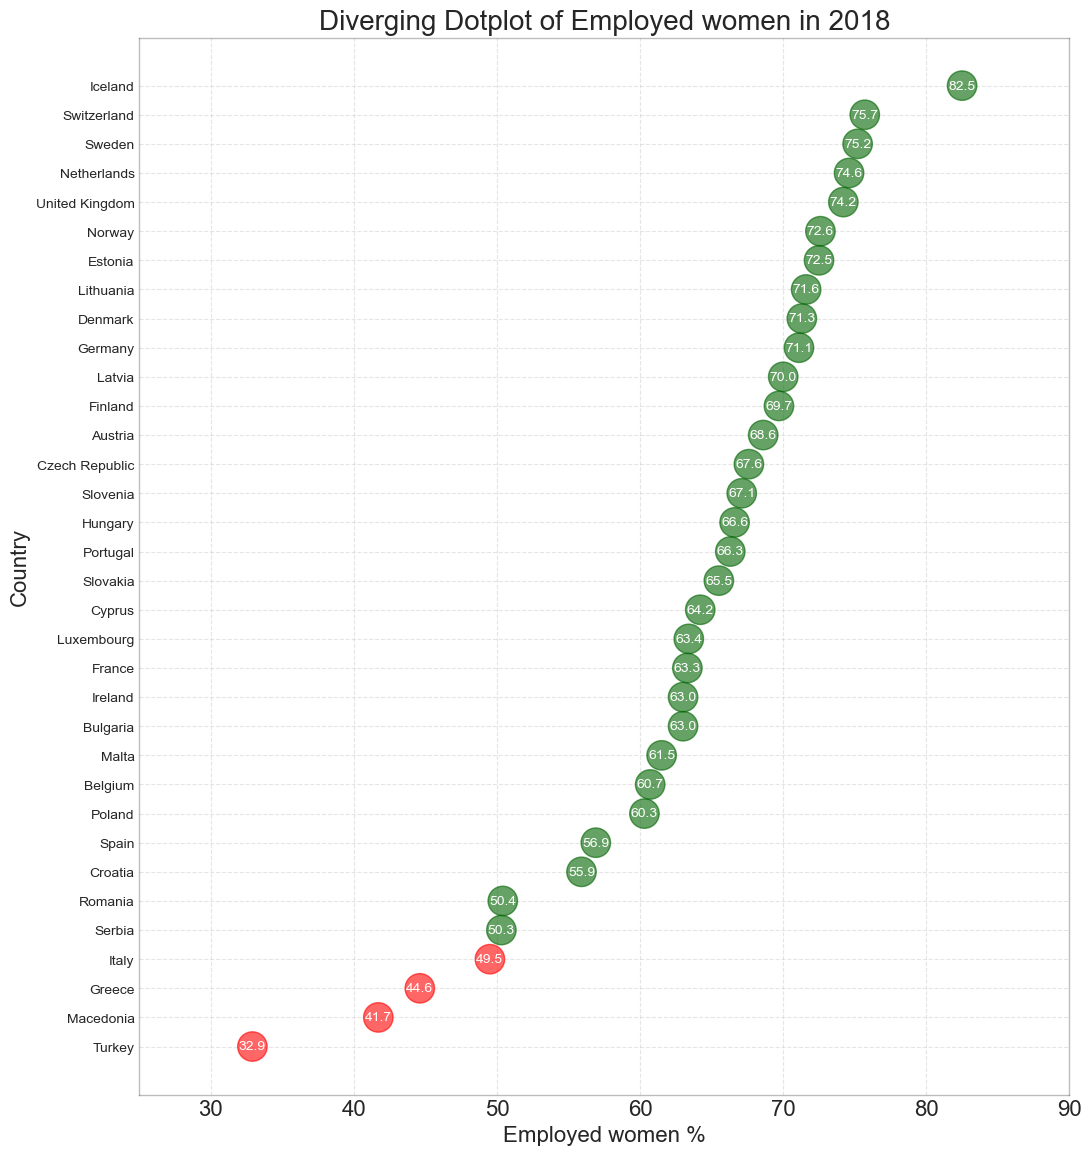

In [7]:
# data preparation
df_emp = df.copy()
x = df_emp.loc[:, ['employed_women_2018']]
df_emp['employed_perc'] = (x * 100)
df_emp['colors'] = ['red' if x < 50 else 'darkgreen' for x in df_emp['employed_perc']]
df_emp.sort_values('employed_perc', inplace=True)
df_emp.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(12, 14), dpi=100)
plt.scatter(df_emp.employed_perc, df_emp.index, s=450, alpha=.6, color=df_emp.colors)
for x, y, tex in zip(df_emp.employed_perc, df_emp.index, df_emp.employed_perc):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color': 'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df_emp.index, df_emp.country, fontsize=10)
plt.title('Diverging Dotplot of Employed women in 2018', fontdict={'size': 20})
plt.xlabel('Employed women %')
plt.ylabel('Country')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(25, 90)
plt.show()

The country with the lowest employment rate of women in Europe is Turkey, where only about 33% of women has a job. Other European states that has a percentage below 50% are Macedonia, Greece and Italy. On the opposite side of the graph we can find the most virtuous nations: Iceland, Switzerland, Sweden and Netherlands. 
If we compare the percentage of employed women of the above-mentioned countries with their fertility rates, we see that Italy, Greece and Macedonia do not overcome the threshold of 1.42 children per woman on average. On the contrary, the states with the highest number of women with a job are mainly above the cut-off value of 1.6 children per woman, except Switzerland. 
This result seems to support our initial hypotesis about the positive relationship between the women employment and the fertility rate, even if a deeper analysis is necessary.
A country which appears to be outside the lines is Turkey. Despite its extremely low percentage of employed women, this state has the highest fertility rate (almost 2 children per woman). A possible explanation could be found in the role of females depicted by the local culture. Domestic violence is still a widespread problem in the country, as well as child marriage and a significant gender gap in secondary education. So the fate of Turkish women is usually confined inside the walls of the house. (https://en.wikipedia.org/wiki/Women_in_Turkey)

## Income and social benefits

The last but not least parameters that we take into account in the exploratory analysis are the annual mean income procapite and the social protection benefits destined by the governments to families and children.

According to Eurostat metadata definitions, the "total disposable income of a household is calculated by adding together the personal income received by all of household members plus income received at household level." The disposable income includes income from work, investment and property, transfers between households and social transfers (like old-age pensions). Then the income of the household is used to calculate the one of every component using an equivalisation factor, which takes into account "the impact of differences in household size and composition". 

As concerns social protection benefits, the definition used by Eurostat describes them as "all interventions from public or private bodies intended to relieve households and individuals of the burden of a defined set of risks or needs, provided that there is neither a simultaneous reciprocal nor an individual arrangement involved". They are collected through ESSPROS (European System of integrated Social PROtection Statistics), which "is an instrument of statistical observation which enables international comparison of the administrative national data on social protection in the EU Member States". 
Benefits paid to non-residents are included, while benefits received from citizens outside the country are not considered in the calculation. The values reported in the dataset are expressed per inhabitants at constant prices referring to 2010.

The reason why we have chosen to take into account these two variables is similar to the one already exposed for the women employment. A whealty economic condition and a reliable public support to the families could encourage women and couples to have children, because they know they can easily afford the expenses that such a decision implies. 

Let's see how income and social benefits for families and children are distributed across Europe.

In [8]:
df_copy = df.copy()
df_copy.sort_values('mean_income', inplace=True)
df_copy.reset_index(inplace=True)
df_copy

,index,geo,country,population,age_1_child,employed_women_2018,abortion_ratio,social_benefit,mean_income,fertility_rate,lb_18y_procapite,lb_30y_procapite,lb_inmar_procapite,lb_outmar_procapite,lb_foreign_procapite
0,21,MK,Macedonia,2075301,26.9,0.417,184.3,30.91,2842.0,1.42,0.000108,0.000703,0.009033,0.001247,0.000374
1,28,RS,Serbia,7001444,28.1,0.503,156.0,63.86,3040.0,1.49,0.000096,0.000634,0.006691,0.002447,0.000088
2,27,RO,Romania,19533481,26.7,0.504,258.0,138.12,3825.0,1.76,0.000252,0.000715,0.007170,0.003209,0.000127
3,2,BG,Bulgaria,7050034,26.2,0.630,376.8,113.35,4644.0,1.56,0.000222,0.000567,0.003664,0.005158,0.000056
4,32,TR,Turkey,80810525,26.3,0.329,33.1,54.12,4914.0,1.99,0.000231,0.000902,0.014856,0.000442,0.000253
5,14,HU,Hungary,9778371,28.2,0.666,288.2,254.93,6123.0,1.55,0.000155,0.000616,0.005362,0.004196,0.000137
6,25,PL,Poland,37976687,27.4,0.603,2.8,311.85,7337.0,1.46,0.000071,0.000766,0.007520,0.002701,0.000135
7,13,HR,Croatia,4105493,28.8,0.559,69.2,232.63,7371.0,1.47,0.000060,0.000668,0.007136,0.001863,0.000099
8,31,SK,Slovakia,5443120,27.1,0.655,156.8,224.52,7870.0,1.54,0.000181,0.000753,0.006354,0.004235,0.000127
9,18,LT,Lithuania,2808901,27.8,0.716,127.5,219.13,8415.0,1.63,0.000084,0.000804,0.007375,0.002642,0.000269


In [9]:
df_copy.pop('index')

0     21
1     28
2     27
3      2
4     32
5     14
6     25
7     13
8     31
9     18
10    20
11     9
12     5
13    26
14     8
15    30
16    22
17    10
18     4
19    17
20     1
21    12
22    33
23     6
24    23
25    11
26    29
27     0
28    15
29     7
30    19
31    24
32    16
33     3
Name: index, dtype: int64

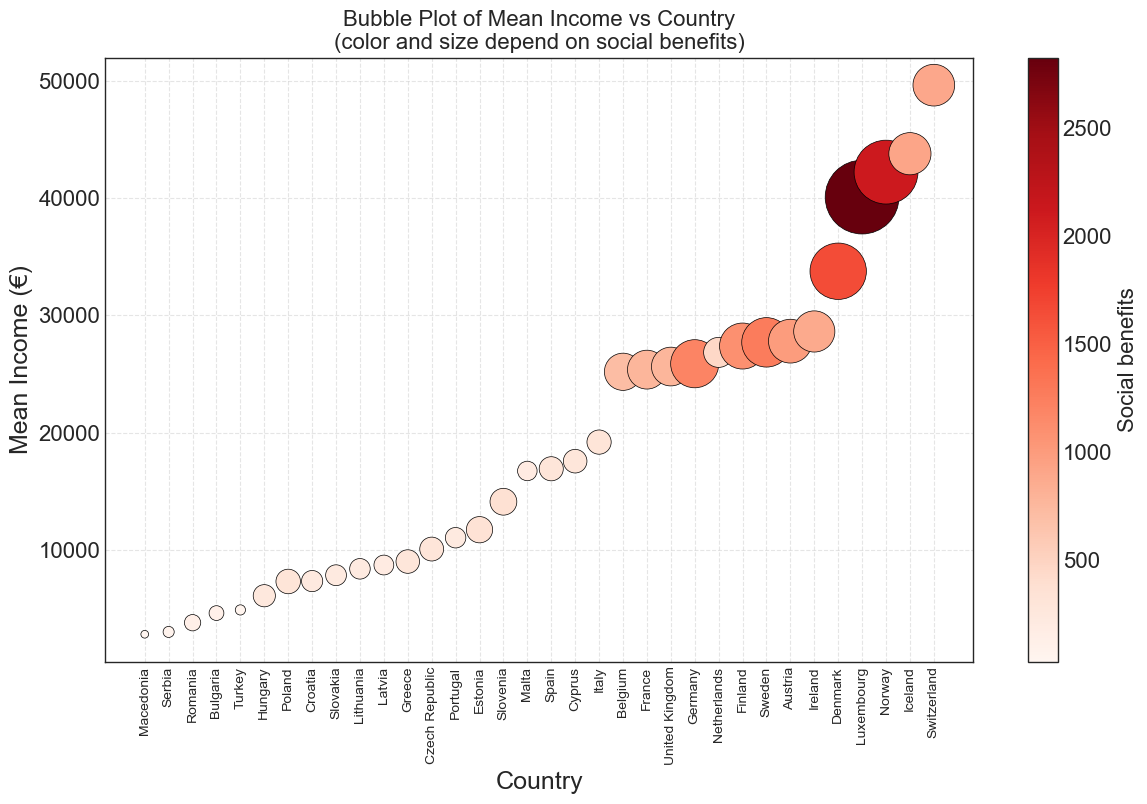

In [10]:
#Draw plot and decorations
fig = plt.figure(figsize=(14, 8), dpi=100, facecolor="w", edgecolor="k")
plt.scatter(
    df_copy.index,
    "mean_income",
    data=df_copy,
    s="social_benefit",
    c="social_benefit",
    cmap="Reds",
    edgecolors="black",
    linewidths=0.5,
)
plt.title(
    "Bubble Plot of Mean Income vs Country\n(color and size depend on social benefits)",
    fontsize=16,
)

plt.xticks(df_copy.index, df_copy.country, fontsize=10, rotation='vertical')
plt.grid(linestyle='--', alpha=0.5)

plt.xlabel("Country", fontsize=18)
plt.ylabel("Mean Income (€)", fontsize=18)
plt.colorbar(label='Social benefits')
plt.show()

The European country with the lowest mean income procapite is Macedonia and from the size and the low intensity of the color of its dot we can see that also the social benefits destined to families are limited. Switzerland, instead, has the highest mean income and also a reasonable amount of social supports. As happened for the women employment indicator, Italy is not on one of the best step of this staircase. In fact, its annual mean income does not reach 20 thousands of euros and also the public welfare destined to families and children is poor if compared to the one of the countries on the right side of the graph. 

States located on the right-end side, like Switzerland, Iceland and Norway, have also remarkable women employment rates and a fertility rate that does not fall below 1.5 children per woman. Beside a high fertility rate, these top countries present a considerable abortion ratio. This fact highlights the possible coexistence between the abortion right and a significant number of births in the country. 

Luxembourg can be considered as a sort of outlier because the majority of its population lives outside the country, but still perceives the social benefits destined to families and children. This implies an overestimation of the social benefits per capita, which is calculated based on the resident population. 